# Conceptual

# Practical

## 1. Generate data and get an overview of the data

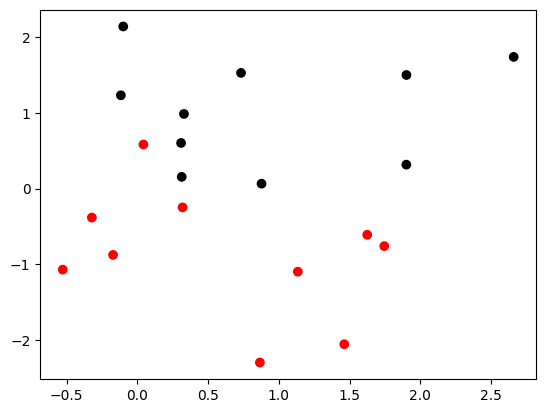

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
x = np.random.standard_normal((20,2))

y = np.array([-1]*10 + [1] * 10)
x[y==1,:] = x[y==1,:] + 1
plt.scatter(x[:,0], x[:,1], c=y, cmap='flag')
plt.show() # not linear separable

In [16]:
print(x)
print(y)

[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]
 [ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]
 [ 1.46210794 -2.06014071]
 [-0.3224172  -0.38405435]
 [ 1.13376944 -1.09989127]
 [-0.17242821 -0.87785842]
 [ 0.04221375  0.58281521]
 [-0.10061918  2.14472371]
 [ 1.90159072  1.50249434]
 [ 1.90085595  0.31627214]
 [ 0.87710977  0.06423057]
 [ 0.73211192  1.53035547]
 [ 0.30833925  0.60324647]
 [ 0.3128273   0.15479436]
 [ 0.32875387  0.9873354 ]
 [-0.11731035  1.2344157 ]
 [ 2.65980218  1.74204416]]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1]


## 2. Learn and assess an support vector (soft margin) classifier

In [18]:
import pandas as pd

df = pd.DataFrame({'x1':x[:,0],
                    'x2':x[:,1],
                    'y':y})

df

,x1,x2,y
0,1.624345,-0.611756,-1
1,-0.528172,-1.072969,-1
2,0.865408,-2.301539,-1
3,1.744812,-0.761207,-1
4,0.319039,-0.249370,-1
5,1.462108,-2.060141,-1
6,-0.322417,-0.384054,-1
7,1.133769,-1.099891,-1
8,-0.172428,-0.877858,-1
9,0.042214,0.582815,-1


coefficients: [[0.65333729 2.35330532]]
intercep: [-0.62142132]


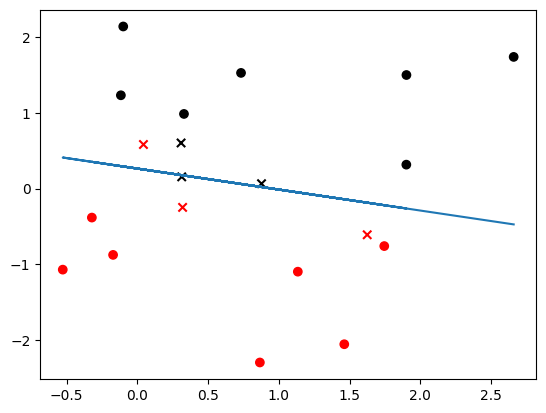

In [41]:
from sklearn.svm import SVC

X = df[['x1', 'x2']]
y = df['y']

svm = SVC(C=10.0, kernel='linear', random_state=42)
svm.fit(X,y)

print(f'coefficients: {svm.coef_}')
print(f'intercep: {svm.intercept_}')

sv_idx = svm.support_


hyperplane_function = lambda x: -svm.coef_[0,0]/svm.coef_[0,1] * x - (svm.intercept_/svm.coef_[0,1])

plt.plot(X['x1'], np.apply_along_axis(hyperplane_function, 0, x[:,0]))
plt.scatter(X[~X['x1'].index.isin(sv_idx)]['x1'], X[~X['x2'].index.isin(sv_idx)]['x2'], c=y[~y.index.isin(sv_idx)], cmap='flag', marker='o')
plt.scatter(X[X['x1'].index.isin(sv_idx)]['x1'], X[X['x2'].index.isin(sv_idx)]['x2'], c=y[y.index.isin(sv_idx)], cmap='flag', marker='x')
plt.show()

In [38]:
sv_idx.tolist()

[0, 3, 4, 6, 9, 12, 13, 15, 16]

coefficients: [[0.01797572 0.76322197]]
intercep: [-0.18099982]
indeces of support vectors: [ 0  3  4  6  7  8  9 11 12 13 14 15 16 17 18]


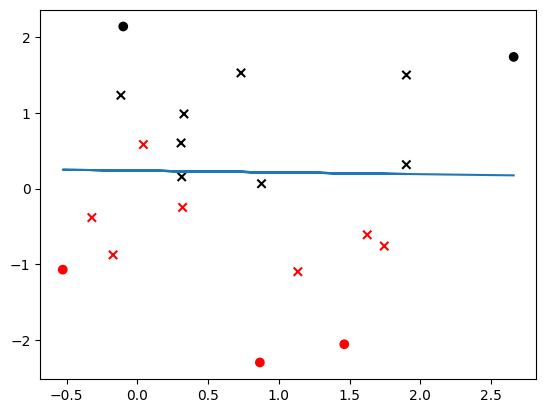

In [42]:
svm = SVC(C=0.1, kernel='linear', random_state=42)
svm.fit(X,y)

print(f'coefficients: {svm.coef_}')
print(f'intercep: {svm.intercept_}')


sv_idx = svm.support_
print(f'indeces of support vectors: {sv_idx}')


hyperplane_function = lambda x: -svm.coef_[0,0]/svm.coef_[0,1] * x - (svm.intercept_/svm.coef_[0,1])

plt.plot(X['x1'], np.apply_along_axis(hyperplane_function, 0, x[:,0]))
plt.scatter(X[~X['x1'].index.isin(sv_idx)]['x1'], X[~X['x2'].index.isin(sv_idx)]['x2'], c=y[~y.index.isin(sv_idx)], cmap='flag', marker='o')
plt.scatter(X[X['x1'].index.isin(sv_idx)]['x1'], X[X['x2'].index.isin(sv_idx)]['x2'], c=y[y.index.isin(sv_idx)], cmap='flag', marker='x')
plt.show()

### Interprete the results and the variance-bias tradeoff.

## 3. Learn and assess an SVM classifier

## 4. Learn and assess an SVM classifier for multiple classes

## 5. Apply SVM to Gene Expression Data